<a href="https://colab.research.google.com/github/LeeTunMT/KTLT/blob/main/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMean Clustering

## Import libraries, dataset and show dataset

In [ ]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math
from scipy.spatial import distance
from sklearn.cluster import KMeans

In [ ]:
college = pd.read_csv('https://raw.githubusercontent.com/hoang11235813/NMKHDL_datasets/main/College.csv', index_col = 0)

In [ ]:
college.head(10)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


## I. Data preprocessing

In [ ]:
# Check for NULL values
college.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

There are no NULL values for each column so we are ready to split dataset into features and label (which is Private column)

In [ ]:
X, y = college.values[:, 1:],college.values[:, 0]

Now I'll change X dtype cause I'm gonna use cdist for KMeans class and cdist doesn't accept object dtype.

Also encode y because categorical value (Yes: 1, No: 0)

In [ ]:
X = X.astype('float64')
d = {'Yes': 1, 'No': 0}
y = np.array([d[i] for i in y], dtype = 'int32')

## II. Implement the KMeans clustering algorithm from scratch

### II.1. Implementing KMeans class

In [ ]:
# Constructing KMeans class
class KMeanSelf:
  '''
  Parameters
  ----------------------
  K: number of clusters, int, default 3

  conv_tol: convergence toleration, float, default 0.02, 0 < conv_tol < 1

  max_iter: max_iteration, int, default 10000

  Attributes
  ----------------------
  cluster_centers_: K cluster centers coordinates, if the algorithm stops before fully converging (see conv_tol and max_iter), these will not be consistent with labels_.

  labels_ : labels of fit X

  n_iters_: numbers of iterations needed to complete fitting

  inertia_:  Sum of squared distances of samples to their closest cluster center

  Methods:
  -----------------------
  - fit: method to train the K-Means model on the input data.

  - transform: method to transform input data to a cluster-distance space.

  - predict: method to predict cluster labels for new data points.

  - fit_transform: method to compute clustering and transform X to cluster-distance space. (Equivalent to fit(X).transform(X), but more efficiently implemented).

  - fit_predict: method to compute cluster centers and predict cluster index for each sample. (Convenience method; equivalent to calling fit(X) followed by predict(X)).
  '''
  def __init__(self, K: int=3, conv_tol: float = 0.02, max_iter: int = 10000):
    # Parameters
    self.K = K
    self.conv_tol = conv_tol
    self.max_iter = max_iter
    # Attributes
    self.cluster_centers_ = Nonxe
    self.labels_ = None
    self.n_iters_ = 0
    self.inertia_ = 0

  def __initialize_centroids(self, X):
    ids = np.random.permutation(X.shape[0])
    centroids = X[ids[:self.K]]
    return centroids

  def __update_centroids(self, X  ):
    return np.array([X[self.labels_ == k].mean(axis=0) for k in range(self.K)])

  def __compute_dist_percent(self, prev_centroids):
    if self.K == 1: return 0
    dists = []
    for i in range(self.K - 1):
      for j in range(i+1, self.K):
        dists.append(math.dist(self.cluster_centers_[i], self.cluster_centers_[j]))
    self.inertia_ = min(dists)
    return max([math.dist(self.cluster_centers_[i], prev_centroids[i]) for i in range(self.K)]) / self.inertia_

  def fit(self, X):
    # init centroids
    self.cluster_centers_ = self.__initialize_centroids(X)
    prev_centroids = np.zeros((self.K, X.shape[1]))
    # training
    while True:
        # compute distances from X_i to centroids
        distances = distance.cdist(X, self.cluster_centers_) # shape: (N, K)
        # assign new labels
        self.labels_ = np.argmin(distances, axis = 1)
        # check convergence
        if (self.__compute_dist_percent(prev_centroids) <= self.conv_tol) or self.n_iters_ >= self.max_iter:
            break
        prev_centroids = self.cluster_centers_
        self.cluster_centers_ = self.__update_centroids(X)
        # increase iteration count
        self.n_iters_ += 1
    return self

  def transform(self, X):
    return np.array([[np.linalg.norm(X[i] - self.cluster_centers_[k]) for k in range(self.K)] for i in range(X.shape[0])])

  def predict(self, X):
    return np.argmin(distance.cdist(X, self.cluster_centers_), axis = 1)

  def fit_transform(self, X):
    self.fit(X)
    return self.transform(X)

  def fit_predict(self, X):
    self.fit(X)
    return self.predict(X)



### III.2. Train data using the implemented model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 54)

In [ ]:
kmself = KMeanSelf(K = 3, conv_tol = 0.02, max_iter = 100)
X_new = kmself.fit_transform(X_train)
y_train_pred = kmself.predict(X_train)

## III. Testing and Validation

### III.1. Test KMeans class with test set

In [ ]:
y_pred = kmself.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1,
       2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 1])

### III.2. Validate model correctness by comparing results with sklearn's KMeans model

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
km.fit_transform(X_train)
km.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2,
       2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1,
       2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2,
       0, 2], dtype=int32)

Comparing the 2 model, we can see the different prediction and both follows the similar pattern. This is because both KMeans have randomness when implementing which results in different label predictions while both pattern are similar to each other. This may result in very low accuracy for the model evaluation.

The solution is to set random_state to a constant number until the prediction goes on our way (at least 75% accuracy score for y prediction from both models).

In [ ]:
rd = 0
acc = 0
while True:
  km = KMeans(n_clusters = 3, random_state = rd, n_init = 10)
  km.fit_transform(X_train)
  y_km_pred = km.predict(X_test)
  acc = accuracy_score(y_km_pred, y_pred)
  if (acc > 0.75): break
  rd += 1

print(f'The 2 models have {acc * 100}% similarity for a random_state of {rd}')
y_km_pred

The 2 models have 98.71794871794873% similarity for a random_state of 2


array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1,
       1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 1], dtype=int32)

### III.3. Experimenting with different K

Text(0.5, 1.0, 'Inertia by number of clusters')

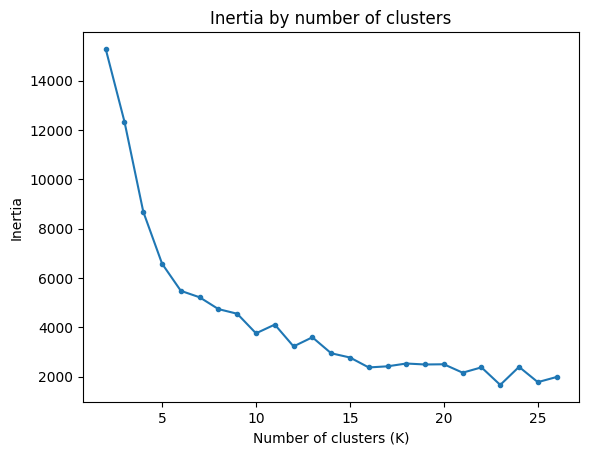

In [ ]:
k_inertia = [KMeanSelf(K = k).fit(X_train).inertia_ for k in range(2, math.floor(math.sqrt(X.shape[0])))]

plt.plot(np.arange(2, math.floor(math.sqrt(X.shape[0]))), k_inertia, marker = '.', linestyle = '-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia by number of clusters')

As the plot shows, with elbow method, 6 centroids is the optimal value for KMeans

In [ ]:
# KMeans model with K = 6
y_train_6_pred = KMeanSelf(K = 6).fit_predict(X_train)

Using PCA for visualizing data

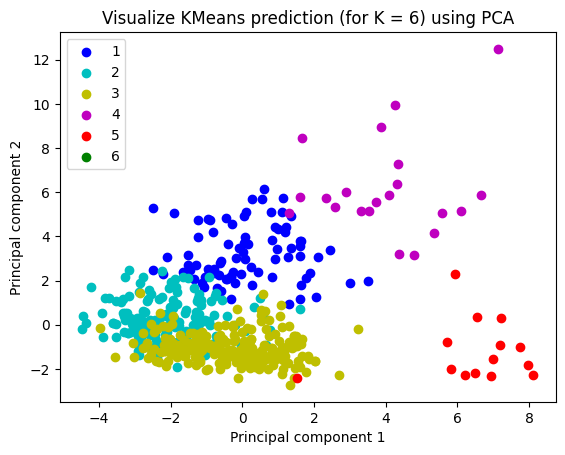

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
sc = StandardScaler()
X_scaled = sc.fit_transform(X_train)

colors = ['b', 'c', 'y', 'm', 'r', 'g']
PCs = pca.fit_transform(X_scaled)
for i in range(1, 7):
  ix = np.where(y_train_6_pred == i)
  plt.scatter(PCs[ix, 0], PCs[ix, 1], c = colors[i-1], label = i)
  plt.title('Visualize KMeans prediction (for K = 6) using PCA')
  plt.xlabel('Principal component 1')
  plt.ylabel('Principal component 2')
  plt.legend()